In [2]:
from scripts.data_preprocessor import load_data, preprocessor
from scripts.train_models import TrainAndPredict, calculate_rmse

In [3]:
df = load_data('../data/analysis_data/dataset.csv')
print("Data preprocessing...")
X_train, y_train, treatment_train, X_test, y_test, treatment_test = preprocessor(df)
print("Preprocessing done!")

# Instantiate TrainAndPredict class with preprocessed data
train_predictor = TrainAndPredict(X_train, y_train, treatment_train, X_test)
s_estimates, t_estimates, x_estimates, r_estimates = train_predictor.train_and_predict()

# Save the CATE estimates to a CSV file
s_output_path = '../results/s_predictions.csv'
t_output_path = '../results/t_predictions.csv'
x_output_path = '../results/x_predictions.csv'
r_output_path = '../results/r_predictions.csv'

s_estimates.to_csv(s_output_path, index=False)
t_estimates.to_csv(t_output_path, index=False)
x_estimates.to_csv(x_output_path, index=False)
r_estimates.to_csv(r_output_path, index=False)

Data preprocessing...
Encoded Column Names: ['PreInterventionFixedMindset', 'SchoolAchievementLevel', 'SchoolMinorityComposition', 'PovertyConcentration', 'TotalStudentPopulation', 'StudentRaceEthnicity_2', 'StudentRaceEthnicity_3', 'StudentRaceEthnicity_4', 'StudentRaceEthnicity_5', 'StudentRaceEthnicity_6', 'StudentRaceEthnicity_7', 'StudentRaceEthnicity_8', 'StudentRaceEthnicity_9', 'StudentRaceEthnicity_10', 'StudentRaceEthnicity_11', 'StudentRaceEthnicity_12', 'StudentRaceEthnicity_13', 'StudentRaceEthnicity_14', 'StudentRaceEthnicity_15', 'StudentGender_2', 'FirstGenCollegeStatus_1', 'SchoolUrbanicity_1', 'SchoolUrbanicity_2', 'SchoolUrbanicity_3', 'SchoolUrbanicity_4']
Preprocessing done!
S-Learner CATE:    PreInterventionFixedMindset  SchoolAchievementLevel  \
0                    -0.439024                0.638664   
1                    -0.509044               -0.245513   
2                    -0.214474                1.362762   
3                    -0.326688                1

In [3]:
# Extract true outcomes for RMSE calculation
true_outcomes = y_test

# Calculate RMSE for S-Learner
s_rmse = calculate_rmse(true_outcomes, s_estimates['s_CATE'])
print("S-Learner RMSE:", s_rmse)

# Calculate RMSE for T-Learner
t_rmse = calculate_rmse(true_outcomes, t_estimates['t_CATE'])
print("T-Learner RMSE:", t_rmse)

# Calculate RMSE for X-Learner
x_rmse = calculate_rmse(true_outcomes, x_estimates['x_CATE'])
print("X-Learner RMSE:", x_rmse)

# Calculate RMSE for R-Learner
r_rmse = calculate_rmse(true_outcomes, r_estimates['r_CATE'])
print("R-Learner RMSE:", r_rmse)

S-Learner RMSE: 0.6487850343259657
T-Learner RMSE: 0.6487854171333762
X-Learner RMSE: 0.6486068156143151
R-Learner RMSE: 0.6487850343261987


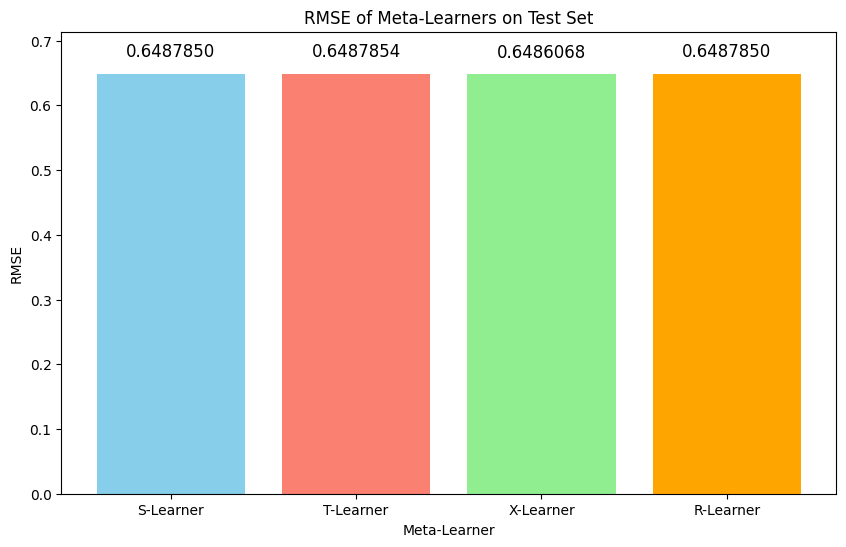

In [4]:
import matplotlib.pyplot as plt

# RMSE values for each meta-learner with more decimal precision
rmse_values = [s_rmse, t_rmse, x_rmse, r_rmse]
learners = ['S-Learner', 'T-Learner', 'X-Learner', 'R-Learner']

# Plotting the RMSE values
plt.figure(figsize=(10, 6))
plt.bar(learners, rmse_values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.ylabel('RMSE')
plt.xlabel('Meta-Learner')
plt.title('RMSE of Meta-Learners on Test Set')
plt.ylim(0, max(rmse_values) * 1.1)  # Add some space above the highest bar for readability

# Annotate the bars with RMSE values with higher precision
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.02, f"{v:.7f}", ha='center', va='bottom', fontsize=12)

plt.show()
